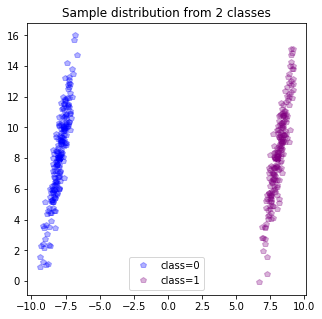

In [10]:
import numpy as np 
np.random.seed(0)
import matplotlib.pyplot as plt
N_Classes  = 2 
N_FEATURES = 2 
_N = 200
N_SAMPLE  = _N * N_Classes


cov = np.array([[0.3, 1.5], [1.5, 9.0]])

mean1 = np.array([-8, 8])
mean2 = np.array([8, 8])
npMEANS  = np.array([mean1,mean2])

colors   = np.array(["blue","purple"])
X1 = []


plt.figure(figsize=(5,5))
for icluster in range(N_Classes):
    color     = colors[icluster]
    npmean    = npMEANS[icluster]
    s_cluster = np.random.multivariate_normal(npmean,cov,_N)
    
    X1.extend(s_cluster) #adds the specified list elements (or any iterable) to the end of the current list.
    
    plt.plot(npmean[0],npmean[1],"X",color=color)
    plt.plot(s_cluster[:,0],s_cluster[:,1],"p",alpha=0.3,color=color,label="class={}".format(icluster))
plt.title("Sample distribution from {} classes".format(N_Classes))
plt.legend()
plt.show()


In [11]:
X1 = np.array(X1)
print("X1:      Data Dimension = (N_SAMPLE,N_FEATURES)  = {}".format(X1.shape))

X1:      Data Dimension = (N_SAMPLE,N_FEATURES)  = (400, 2)


In [12]:
from sklearn.decomposition import PCA
pca = PCA(N_FEATURES)
pca.fit(X1)
print(pca.components_,"\n")
print(pca.explained_variance_)

[[-0.99944262 -0.03338343]
 [ 0.03338343 -0.99944262]] 

[64.91305213  8.75374662]


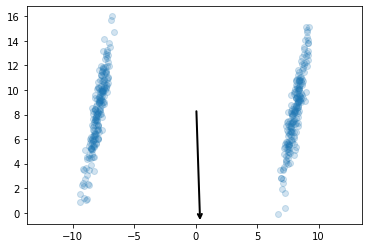

In [13]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [14]:
pca = PCA(n_components=1)
pca.fit(X1)
X_pca = pca.transform(X1)
print("original shape:   ", X1.shape)
print("transformed shape:", X_pca.shape)

original shape:    (400, 2)
transformed shape: (400, 1)


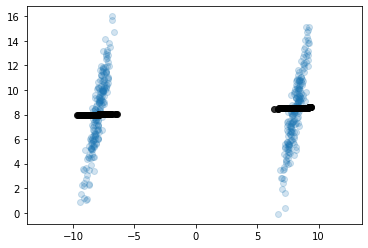

In [15]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color="black")
plt.axis('equal');